# Text Classificatio With Bag Of Words

Outline:

- Download and explore the data
- Apply text preprocessing techniques
- Implement the bag od words model
- Train ML models for text classification
- Make predictions and submit to kaggle


## Download and Explore the Data

outline:
  - Download the dataset from kaggle to colab
  - Explore the data using pandas
  - Create a small working sample

### Download the dataset to colab

In [2]:
!ls

kaggle.json  sample_data


In [3]:
import os

In [4]:
os.environ['KAGGLE_CONFIG_DIR'] ='.'

In [5]:
!kaggle competitions download -c quora-insincere-questions-classification -f train.csv -p data


 89% 49.0M/54.9M [00:01<00:00, 32.6MB/s]
100% 54.9M/54.9M [00:01<00:00, 34.1MB/s]


In [6]:
!kaggle competitions download -c quora-insincere-questions-classification -f test.csv -p data
!kaggle competitions download -c quora-insincere-questions-classification -f sample_submission.csv -p data

 63% 10.0M/15.8M [00:00<00:00, 39.3MB/s]
100% 15.8M/15.8M [00:00<00:00, 58.9MB/s]
100% 4.09M/4.09M [00:00<00:00, 36.6MB/s]
100% 4.09M/4.09M [00:00<00:00, 36.5MB/s]


### Explore the Data using Pandas

In [7]:
train_fname = 'data/train.csv.zip'
test_fname = 'data/test.csv.zip'
sample_fname = 'data/sample_submission.csv.zip'

In [8]:
import pandas as pd

In [9]:
raw_df = pd.read_csv(train_fname)

In [10]:
raw_df

,qid,question_text,target
0,00002165364db923c7e6,How did Quebec nationalists see their province...,0
1,000032939017120e6e44,"Do you have an adopted dog, how would you enco...",0
2,0000412ca6e4628ce2cf,Why does velocity affect time? Does velocity a...,0
3,000042bf85aa498cd78e,How did Otto von Guericke used the Magdeburg h...,0
4,0000455dfa3e01eae3af,Can I convert montra helicon D to a mountain b...,0
...,...,...,...
1306117,ffffcc4e2331aaf1e41e,What other technical skills do you need as a c...,0
1306118,ffffd431801e5a2f4861,Does MS in ECE have good job prospects in USA ...,0
1306119,ffffd48fb36b63db010c,Is foam insulation toxic?,0
1306120,ffffec519fa37cf60c78,How can one start a research project based on ...,0


In [11]:
sincere_df = raw_df[raw_df.target == 0]

In [12]:
sincere_df.question_text.values[:10]

array(['How did Quebec nationalists see their province as a nation in the 1960s?',
       'Do you have an adopted dog, how would you encourage people to adopt and not shop?',
       'Why does velocity affect time? Does velocity affect space geometry?',
       'How did Otto von Guericke used the Magdeburg hemispheres?',
       'Can I convert montra helicon D to a mountain bike by just changing the tyres?',
       'Is Gaza slowly becoming Auschwitz, Dachau or Treblinka for Palestinians?',
       'Why does Quora automatically ban conservative opinions when reported, but does not do the same for liberal views?',
       'Is it crazy if I wash or wipe my groceries off? Germs are everywhere.',
       'Is there such a thing as dressing moderately, and if so, how is that different than dressing modestly?',
       'Is it just me or have you ever been in this phase wherein you became ignorant to the people you once loved, completely disregarding their feelings/lives so you get to have something g

In [13]:
insincere_df = raw_df[raw_df.target == 1]

In [14]:
insincere_df.question_text.values[0:10]

array(['Has the United States become the largest dictatorship in the world?',
       'Which babies are more sweeter to their parents? Dark skin babies or light skin babies?',
       "If blacks support school choice and mandatory sentencing for criminals why don't they vote Republican?",
       'I am gay boy and I love my cousin (boy). He is sexy, but I dont know what to do. He is hot, and I want to see his di**. What should I do?',
       'Which races have the smallest penis?',
       'Why do females find penises ugly?',
       'How do I marry an American woman for a Green Card? How much do they charge?',
       "Why do Europeans say they're the superior race, when in fact it took them over 2,000 years until mid 19th century to surpass China's largest economy?",
       'Did Julius Caesar bring a tyrannosaurus rex on his campaigns to frighten the Celts into submission?',
       "In what manner has Republican backing of 'states rights' been hypocritical and what ways have they actually r

In [15]:
insincere = [raw_df.target == 1]

In [16]:
insincere

[0          False
 1          False
 2          False
 3          False
 4          False
            ...  
 1306117    False
 1306118    False
 1306119    False
 1306120    False
 1306121    False
 Name: target, Length: 1306122, dtype: bool]

In [17]:
raw_df.target.value_counts(normalize=True)

0    0.93813
1    0.06187
Name: target, dtype: float64

<Axes: >

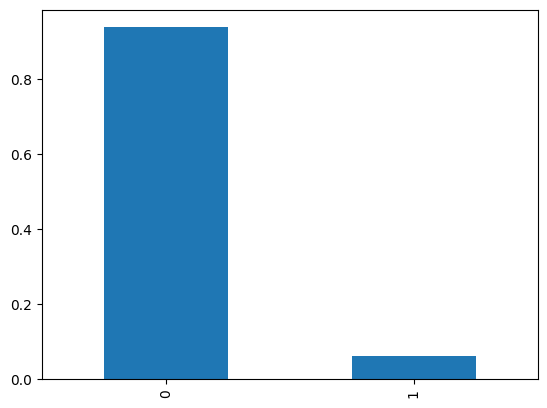

In [18]:
raw_df.target.value_counts(normalize=True).plot(kind='bar')

In [19]:
test_df = pd.read_csv(test_fname)

In [20]:
test_df

,qid,question_text
0,0000163e3ea7c7a74cd7,Why do so many women become so rude and arroga...
1,00002bd4fb5d505b9161,When should I apply for RV college of engineer...
2,00007756b4a147d2b0b3,What is it really like to be a nurse practitio...
3,000086e4b7e1c7146103,Who are entrepreneurs?
4,0000c4c3fbe8785a3090,Is education really making good people nowadays?
...,...,...
375801,ffff7fa746bd6d6197a9,How many countries listed in gold import in in...
375802,ffffa1be31c43046ab6b,Is there an alternative to dresses on formal p...
375803,ffffae173b6ca6bfa563,Where I can find best friendship quotes in Tel...
375804,ffffb1f7f1a008620287,What are the causes of refraction of light?


In [21]:
sub_df = pd.read_csv(sample_fname)

In [22]:
sub_df

,qid,prediction
0,0000163e3ea7c7a74cd7,0
1,00002bd4fb5d505b9161,0
2,00007756b4a147d2b0b3,0
3,000086e4b7e1c7146103,0
4,0000c4c3fbe8785a3090,0
...,...,...
375801,ffff7fa746bd6d6197a9,0
375802,ffffa1be31c43046ab6b,0
375803,ffffae173b6ca6bfa563,0
375804,ffffb1f7f1a008620287,0


In [23]:
sub_df.prediction.value_counts()

0    375806
Name: prediction, dtype: int64

### Create a Working Sample

In [24]:
SAMPLE_SIZE =100_000

In [25]:
sample_df = raw_df.sample(SAMPLE_SIZE, random_state= 50)

In [26]:
sample_df

,qid,question_text,target
793006,9b62f614df89ffd929e7,What is the best website to browse and order b...,0
967175,bd7d802f7d005efb9546,Is it possible for an Android Xiaomi phone to ...,0
133728,1a2bdd15d1c9b1ea7af1,Where can I get my Moto E4 plus rooted in Mumbai?,0
981324,c03dd81b3e6f0d806649,How do you deal with someone who is making you...,0
223722,2bc04bcabae6e449822c,Does Tinder work in Aurangabad?,0
...,...,...,...
83533,105a7622175fd2d265c0,"Why are butane, isobutane, and propane used in...",0
547439,6b3e832095358497dcf3,How do I win a girl?,0
180200,23391b47af81e7441d8c,Why Monday is so far to Friday but Friday is n...,0
313834,3d7e703306150dcfff41,If you have to choose between survival and dig...,0


## Text Preprocessing Techniques

outline:
  - Understand the bag of words model
  - Tokenization
  - Stop word removal
  - Stemming

### Bag of words Intution
  - create a list of all the words across all the text documents
  - convert each document int vectors counts of each word

Limitations:
  - There may be too many words in the dataset
  - Some words may occur too frequently
  - Some words may occur very rarely or only once
  - A single word may have many forms(go, gone, going or bird vs. birds)

In [27]:
q0 = sincere_df.question_text.values[1]
q0

'Do you have an adopted dog, how would you encourage people to adopt and not shop?'

In [28]:
q1 = raw_df[raw_df.target ==1].question_text.values[0]
q1

'Has the United States become the largest dictatorship in the world?'

### Tokenization
 splitting a document into words and separators

In [29]:
import nltk

In [30]:
from nltk.tokenize import word_tokenize

In [31]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [32]:
q0

'Do you have an adopted dog, how would you encourage people to adopt and not shop?'

In [33]:
word_tokenize(q0)

['Do',
 'you',
 'have',
 'an',
 'adopted',
 'dog',
 ',',
 'how',
 'would',
 'you',
 'encourage',
 'people',
 'to',
 'adopt',
 'and',
 'not',
 'shop',
 '?']

In [34]:
 word_tokenize('this is (somthing) with, a lot of , punctuation;')

['this',
 'is',
 '(',
 'somthing',
 ')',
 'with',
 ',',
 'a',
 'lot',
 'of',
 ',',
 'punctuation',
 ';']

In [35]:
q1

'Has the United States become the largest dictatorship in the world?'

In [36]:
word_tokenize(q1)

['Has',
 'the',
 'United',
 'States',
 'become',
 'the',
 'largest',
 'dictatorship',
 'in',
 'the',
 'world',
 '?']

In [37]:
q0_tok = word_tokenize(q0)
q1_tok = word_tokenize(q1)

### Stop Word Removal
Removing commonly occuring words

In [38]:
from nltk.corpus import stopwords

In [39]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [40]:
english_stopwords = stopwords.words('english')

In [41]:
", ".join(english_stopwords)

"i, me, my, myself, we, our, ours, ourselves, you, you're, you've, you'll, you'd, your, yours, yourself, yourselves, he, him, his, himself, she, she's, her, hers, herself, it, it's, its, itself, they, them, their, theirs, themselves, what, which, who, whom, this, that, that'll, these, those, am, is, are, was, were, be, been, being, have, has, had, having, do, does, did, doing, a, an, the, and, but, if, or, because, as, until, while, of, at, by, for, with, about, against, between, into, through, during, before, after, above, below, to, from, up, down, in, out, on, off, over, under, again, further, then, once, here, there, when, where, why, how, all, any, both, each, few, more, most, other, some, such, no, nor, not, only, own, same, so, than, too, very, s, t, can, will, just, don, don't, should, should've, now, d, ll, m, o, re, ve, y, ain, aren, aren't, couldn, couldn't, didn, didn't, doesn, doesn't, hadn, hadn't, hasn, hasn't, haven, haven't, isn, isn't, ma, mightn, mightn't, mustn, mus

In [42]:
def remove_stopwords(tokens):
  return [word for word in tokens if word.lower() not in english_stopwords]

In [43]:
q0

'Do you have an adopted dog, how would you encourage people to adopt and not shop?'

In [44]:
q0_tok

['Do',
 'you',
 'have',
 'an',
 'adopted',
 'dog',
 ',',
 'how',
 'would',
 'you',
 'encourage',
 'people',
 'to',
 'adopt',
 'and',
 'not',
 'shop',
 '?']

In [45]:
q0_stp = remove_stopwords(q0_tok)
q0_stp

['adopted', 'dog', ',', 'would', 'encourage', 'people', 'adopt', 'shop', '?']

In [46]:
q1

'Has the United States become the largest dictatorship in the world?'

In [47]:
q1_tok

['Has',
 'the',
 'United',
 'States',
 'become',
 'the',
 'largest',
 'dictatorship',
 'in',
 'the',
 'world',
 '?']

In [48]:
q1_stp = remove_stopwords(q1_tok)
q1_stp

['United', 'States', 'become', 'largest', 'dictatorship', 'world', '?']

### Stemming
  - 'go','gone','going',-> go
  - 'birds','bird' -> bird

In [49]:
from nltk.stem.snowball import SnowballStemmer

In [50]:
stemmer = SnowballStemmer(language='english')

In [51]:
stemmer.stem('supposedly')

'suppos'

In [52]:
q0_stm = [stemmer.stem(word) for word in q0_stp]
q0_stm

['adopt', 'dog', ',', 'would', 'encourag', 'peopl', 'adopt', 'shop', '?']

In [53]:
q0_stp

['adopted', 'dog', ',', 'would', 'encourage', 'people', 'adopt', 'shop', '?']

In [54]:
q1_stm = [stemmer.stem(word) for word in q1_stp]
q1_stm

['unit', 'state', 'becom', 'largest', 'dictatorship', 'world', '?']

In [55]:
q1_stp

['United', 'States', 'become', 'largest', 'dictatorship', 'world', '?']

### Lemmatization
  - love -> love
  - loving -> love
  - lovable -> love

## Implement Bag of Words
  outline:
  
    - Create a vocabulary using Count Vectorizer
    - Transform text to vectors using Count Vectorizer
    - Configure text preprocessing in Count Vectorizer

### Create a Vocabulary

In [56]:
sample_df

,qid,question_text,target
793006,9b62f614df89ffd929e7,What is the best website to browse and order b...,0
967175,bd7d802f7d005efb9546,Is it possible for an Android Xiaomi phone to ...,0
133728,1a2bdd15d1c9b1ea7af1,Where can I get my Moto E4 plus rooted in Mumbai?,0
981324,c03dd81b3e6f0d806649,How do you deal with someone who is making you...,0
223722,2bc04bcabae6e449822c,Does Tinder work in Aurangabad?,0
...,...,...,...
83533,105a7622175fd2d265c0,"Why are butane, isobutane, and propane used in...",0
547439,6b3e832095358497dcf3,How do I win a girl?,0
180200,23391b47af81e7441d8c,Why Monday is so far to Friday but Friday is n...,0
313834,3d7e703306150dcfff41,If you have to choose between survival and dig...,0


In [57]:
small_df = sample_df[:5]

In [58]:
small_df.question_text.values

array(['What is the best website to browse and order books?',
       'Is it possible for an Android Xiaomi phone to close the unused apps automatically in order to clear some memory and save more battery charges?',
       'Where can I get my Moto E4 plus rooted in Mumbai?',
       'How do you deal with someone who is making you fall for him only to break your heart in the end?',
       'Does Tinder work in Aurangabad?'], dtype=object)

In [59]:
from sklearn.feature_extraction.text import CountVectorizer

In [60]:
small_vect = CountVectorizer()

In [61]:
small_vect.fit(small_df.question_text)

CountVectorizer()

In [62]:
small_vect.vocabulary_

{'what': 49,
 'is': 27,
 'the': 44,
 'best': 7,
 'website': 48,
 'to': 46,
 'browse': 10,
 'and': 1,
 'order': 36,
 'books': 8,
 'it': 28,
 'possible': 39,
 'for': 21,
 'an': 0,
 'android': 2,
 'xiaomi': 54,
 'phone': 37,
 'close': 14,
 'unused': 47,
 'apps': 3,
 'automatically': 5,
 'in': 26,
 'clear': 13,
 'some': 42,
 'memory': 30,
 'save': 41,
 'more': 31,
 'battery': 6,
 'charges': 12,
 'where': 50,
 'can': 11,
 'get': 22,
 'my': 34,
 'moto': 32,
 'e4': 18,
 'plus': 38,
 'rooted': 40,
 'mumbai': 33,
 'how': 25,
 'do': 16,
 'you': 55,
 'deal': 15,
 'with': 52,
 'someone': 43,
 'who': 51,
 'making': 29,
 'fall': 20,
 'him': 24,
 'only': 35,
 'break': 9,
 'your': 56,
 'heart': 23,
 'end': 19,
 'does': 17,
 'tinder': 45,
 'work': 53,
 'aurangabad': 4}

In [63]:
small_vect.get_feature_names_out()

array(['an', 'and', 'android', 'apps', 'aurangabad', 'automatically',
       'battery', 'best', 'books', 'break', 'browse', 'can', 'charges',
       'clear', 'close', 'deal', 'do', 'does', 'e4', 'end', 'fall', 'for',
       'get', 'heart', 'him', 'how', 'in', 'is', 'it', 'making', 'memory',
       'more', 'moto', 'mumbai', 'my', 'only', 'order', 'phone', 'plus',
       'possible', 'rooted', 'save', 'some', 'someone', 'the', 'tinder',
       'to', 'unused', 'website', 'what', 'where', 'who', 'with', 'work',
       'xiaomi', 'you', 'your'], dtype=object)

### Transform document into Vectors

In [64]:
vectors = small_vect.transform(small_df.question_text)

In [65]:
vectors

<5x57 sparse matrix of type '<class 'numpy.int64'>'
	with 69 stored elements in Compressed Sparse Row format>

In [66]:
small_df.question_text.values[0]

'What is the best website to browse and order books?'

In [67]:
vectors.toarray()

array([[0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
        1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0],
       [1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1,
        0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0,
        1, 0, 2, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
        1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1,
        0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
        1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 2, 1],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
        0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0]])

In [68]:
vectors.shape

(5, 57)

### Configure Count Vectorizer Parameters

In [69]:
stemmer = SnowballStemmer(language='english')

In [70]:
def tokenize(text):
  return [stemmer.stem(word) for word in word_tokenize(text)]

In [71]:
tokenize('What is the real (deal) here?')

['what', 'is', 'the', 'real', '(', 'deal', ')', 'here', '?']

In [122]:
vectorizer = CountVectorizer(lowercase=True,
                            tokenizer=tokenize,
                            stop_words=english_stopwords,
                            max_features=10000)

In [123]:
%%time
vectorizer.fit(sample_df.question_text)

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:409: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ["'d", "'s", 'abov', 'ani', 'becaus', 'befor', 'could', 'doe', 'dure', 'might', 'must', "n't", 'need', 'onc', 'onli', 'ourselv', 'sha', 'themselv', 'veri', 'whi', 'wo', 'would', 'yourselv'] not in stop_words.
  warnings.warn(


CPU times: user 20.3 s, sys: 68.7 ms, total: 20.3 s
Wall time: 20.4 s


CountVectorizer(max_features=10000,
                stop_words=['i', 'me', 'my', 'myself', 'we', 'our', 'ours',
                            'ourselves', 'you', "you're", "you've", "you'll",
                            "you'd", 'your', 'yours', 'yourself', 'yourselves',
                            'he', 'him', 'his', 'himself', 'she', "she's",
                            'her', 'hers', 'herself', 'it', "it's", 'its',
                            'itself', ...],
                tokenizer=<function tokenize at 0x7f8fece3f520>)

In [124]:
len(vectorizer.vocabulary_)

10000

In [125]:
vectorizer.get_feature_names_out()[:100]

array(['!', '#', '$', '%', '&', "'", "''", "'d", "'m", "'s", '(', ')',
       '*', '+', '+1', '+2', ',', '-', '--', '-1', '-2', '-3', '-6', '.',
       '..', '...', '.net', '.what', '/', '/math', '0', '0,1', '0.5', '1',
       '1,000', '1,000,000', '1.5', '1/', '1/2', '1/4', '10', '10+',
       '10+2', '10,000', '10-15', '100', '100,000', '1000', '10000',
       '100k', '100m', '101', '1070', '1080', '10k', '10th', '10x', '11',
       '110', '115', '11th', '12', '120', '125', '12m', '12th', '12v',
       '13', '13-year-old', '130', '13th', '14', '140', '1400', '144',
       '145', '15', '15-20', '150', '1500', '15000', '15k', '15th', '16',
       '160', '1600s', '165', '16th', '17', '18', '180', '1800', '1800s',
       '1812', '1857', '18th', '19', '1900', '1940', '1945'], dtype=object)

In [126]:
%%time
inputs = vectorizer.transform(sample_df.question_text)

CPU times: user 20.9 s, sys: 56.9 ms, total: 21 s
Wall time: 21.4 s


In [127]:
inputs.shape

(100000, 10000)

In [128]:
inputs

<100000x10000 sparse matrix of type '<class 'numpy.int64'>'
	with 748043 stored elements in Compressed Sparse Row format>

In [129]:
sample_df.question_text.values[0]

'What is the best website to browse and order books?'

In [130]:
inputs[0].toarray()

array([[0, 0, 0, ..., 0, 0, 0]])

In [131]:
test_df

,qid,question_text
0,0000163e3ea7c7a74cd7,Why do so many women become so rude and arroga...
1,00002bd4fb5d505b9161,When should I apply for RV college of engineer...
2,00007756b4a147d2b0b3,What is it really like to be a nurse practitio...
3,000086e4b7e1c7146103,Who are entrepreneurs?
4,0000c4c3fbe8785a3090,Is education really making good people nowadays?
...,...,...
375801,ffff7fa746bd6d6197a9,How many countries listed in gold import in in...
375802,ffffa1be31c43046ab6b,Is there an alternative to dresses on formal p...
375803,ffffae173b6ca6bfa563,Where I can find best friendship quotes in Tel...
375804,ffffb1f7f1a008620287,What are the causes of refraction of light?


In [132]:
%%time
test_inputs = vectorizer.transform(test_df.question_text)

CPU times: user 1min 20s, sys: 185 ms, total: 1min 20s
Wall time: 1min 20s


## ML Models for Text Classification

outline:
  - Create a training & validation set
  - Train a logistic regression model
  - Make predictions on training, validation & test data

### Spliting Traning and Validation Set

In [133]:
sample_df

,qid,question_text,target
793006,9b62f614df89ffd929e7,What is the best website to browse and order b...,0
967175,bd7d802f7d005efb9546,Is it possible for an Android Xiaomi phone to ...,0
133728,1a2bdd15d1c9b1ea7af1,Where can I get my Moto E4 plus rooted in Mumbai?,0
981324,c03dd81b3e6f0d806649,How do you deal with someone who is making you...,0
223722,2bc04bcabae6e449822c,Does Tinder work in Aurangabad?,0
...,...,...,...
83533,105a7622175fd2d265c0,"Why are butane, isobutane, and propane used in...",0
547439,6b3e832095358497dcf3,How do I win a girl?,0
180200,23391b47af81e7441d8c,Why Monday is so far to Friday but Friday is n...,0
313834,3d7e703306150dcfff41,If you have to choose between survival and dig...,0


In [134]:
inputs.shape

(100000, 10000)

In [135]:
from sklearn.model_selection import train_test_split

In [136]:
train_inputs ,val_inputs, train_targets, val_targets = train_test_split(inputs, sample_df.target,
                                                                        test_size=0.3, random_state=50)

In [137]:
train_inputs.shape

(70000, 10000)

In [138]:
val_inputs.shape

(30000, 10000)

In [139]:
train_targets.shape

(70000,)

In [140]:
val_targets.shape

(30000,)

### Train Logistic Regression Model

In [141]:
from sklearn.linear_model import LogisticRegression

In [ ]:
MAX_ITER = 1000

In [142]:
model = LogisticRegression(max_iter=10000, solver='sag')

In [143]:
%%time
model.fit(train_inputs, train_targets)

CPU times: user 10.4 s, sys: 7.42 ms, total: 10.4 s
Wall time: 10.4 s


LogisticRegression(max_iter=10000, solver='sag')

### Make predictions using the model

In [144]:
train_preds = model.predict(train_inputs)

In [145]:
train_preds

array([0, 0, 0, ..., 0, 0, 0])

In [146]:
pd.Series(train_preds).value_counts()

0    67389
1     2611
dtype: int64

In [147]:
pd.Series(train_targets).value_counts()

0    65654
1     4346
Name: target, dtype: int64

In [148]:
from sklearn.metrics import accuracy_score

In [149]:
accuracy_score(train_targets, train_preds)

0.9629571428571428

In [150]:
import numpy as np

In [151]:
accuracy_score(train_targets, np.zeros(len(train_targets)))

0.9379142857142857

In [152]:
from sklearn.metrics import f1_score

In [153]:
f1_score(train_targets, train_preds)

0.6272818743711371

In [154]:
f1_score(train_targets, np.zeros(len(train_targets)))

0.0

In [155]:
random_preds = np.random.choice((0,1), len(train_targets))
f1_score(train_targets, random_preds)

0.10955764382305754

In [156]:
val_preds = model.predict(val_inputs)

In [157]:
accuracy_score(val_targets, val_preds)

0.9475333333333333

In [158]:
f1_score(val_targets, val_preds)

0.45984900480439256

In [159]:
sincere_df.question_text.values[0:10]

array(['How did Quebec nationalists see their province as a nation in the 1960s?',
       'Do you have an adopted dog, how would you encourage people to adopt and not shop?',
       'Why does velocity affect time? Does velocity affect space geometry?',
       'How did Otto von Guericke used the Magdeburg hemispheres?',
       'Can I convert montra helicon D to a mountain bike by just changing the tyres?',
       'Is Gaza slowly becoming Auschwitz, Dachau or Treblinka for Palestinians?',
       'Why does Quora automatically ban conservative opinions when reported, but does not do the same for liberal views?',
       'Is it crazy if I wash or wipe my groceries off? Germs are everywhere.',
       'Is there such a thing as dressing moderately, and if so, how is that different than dressing modestly?',
       'Is it just me or have you ever been in this phase wherein you became ignorant to the people you once loved, completely disregarding their feelings/lives so you get to have something g

In [160]:
sincere_df.target.values[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [161]:
model.predict(vectorizer.transform(sincere_df.question_text.values[:10]))

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [162]:
insincere_df.question_text.values[:10]

array(['Has the United States become the largest dictatorship in the world?',
       'Which babies are more sweeter to their parents? Dark skin babies or light skin babies?',
       "If blacks support school choice and mandatory sentencing for criminals why don't they vote Republican?",
       'I am gay boy and I love my cousin (boy). He is sexy, but I dont know what to do. He is hot, and I want to see his di**. What should I do?',
       'Which races have the smallest penis?',
       'Why do females find penises ugly?',
       'How do I marry an American woman for a Green Card? How much do they charge?',
       "Why do Europeans say they're the superior race, when in fact it took them over 2,000 years until mid 19th century to surpass China's largest economy?",
       'Did Julius Caesar bring a tyrannosaurus rex on his campaigns to frighten the Celts into submission?',
       "In what manner has Republican backing of 'states rights' been hypocritical and what ways have they actually r

In [163]:
insincere_df.target.values[:10]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [164]:
model.predict(vectorizer.transform(insincere_df.question_text.values[:10]))

array([0, 0, 1, 1, 0, 0, 0, 0, 0, 1])

## Make Prediction and Submit to Kaggle

In [165]:
test_df

,qid,question_text
0,0000163e3ea7c7a74cd7,Why do so many women become so rude and arroga...
1,00002bd4fb5d505b9161,When should I apply for RV college of engineer...
2,00007756b4a147d2b0b3,What is it really like to be a nurse practitio...
3,000086e4b7e1c7146103,Who are entrepreneurs?
4,0000c4c3fbe8785a3090,Is education really making good people nowadays?
...,...,...
375801,ffff7fa746bd6d6197a9,How many countries listed in gold import in in...
375802,ffffa1be31c43046ab6b,Is there an alternative to dresses on formal p...
375803,ffffae173b6ca6bfa563,Where I can find best friendship quotes in Tel...
375804,ffffb1f7f1a008620287,What are the causes of refraction of light?


In [166]:
test_inputs.shape

(375806, 10000)

In [167]:
test_preds = model.predict(test_inputs)

In [168]:
sub_df

,qid,prediction
0,0000163e3ea7c7a74cd7,0
1,00002bd4fb5d505b9161,0
2,00007756b4a147d2b0b3,0
3,000086e4b7e1c7146103,0
4,0000c4c3fbe8785a3090,0
...,...,...
375801,ffff7fa746bd6d6197a9,0
375802,ffffa1be31c43046ab6b,0
375803,ffffae173b6ca6bfa563,0
375804,ffffb1f7f1a008620287,0


In [169]:
sub_df.prediction = test_preds

In [170]:
sub_df.prediction.value_counts()

0    362438
1     13368
Name: prediction, dtype: int64

In [171]:
sub_df

,qid,prediction
0,0000163e3ea7c7a74cd7,1
1,00002bd4fb5d505b9161,0
2,00007756b4a147d2b0b3,0
3,000086e4b7e1c7146103,0
4,0000c4c3fbe8785a3090,0
...,...,...
375801,ffff7fa746bd6d6197a9,0
375802,ffffa1be31c43046ab6b,0
375803,ffffae173b6ca6bfa563,0
375804,ffffb1f7f1a008620287,0


In [172]:
sub_df.to_csv('submission.csv', index=None)

In [173]:
!head submission.csv

qid,prediction
0000163e3ea7c7a74cd7,1
00002bd4fb5d505b9161,0
00007756b4a147d2b0b3,0
000086e4b7e1c7146103,0
0000c4c3fbe8785a3090,0
000101884c19f3515c1a,0
00010f62537781f44a47,0
00012afbd27452239059,0
00014894849d00ba98a9,0
